In [13]:
# Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import hvplot.pandas

# Data files
registration_data_combined = "/Users/flynnlives/Documents/GitHub/UCI_Project_1/Registration_Files/Combined_Registrations.csv"
fuel_stations = "/Users/flynnlives/Documents/GitHub/UCI_Project_1/ele_fuel_stations (Aug 7 2023).csv"


In [14]:
#Read in
registration_data_df = pd.read_csv(registration_data_combined)
registration_data_df

,Year,State,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Biodiesel,Ethanol/Flex (E85),Compressed Natural Gas (CNG),Propane,Hydrogen,Methanol,Gasoline,Diesel,Unknown Fuel
0,2022,Alabama,8700,4400,50800,48100,449800,100,100,0,0,4077100,126100,30300
1,2022,Alaska,2000,700,9000,8700,48600,0,0,0,0,457100,30500,5500
2,2022,Arizona,65800,20400,150800,61200,446000,600,800,0,0,5476100,198700,70100
3,2022,Arkansas,5100,2500,30600,33300,283900,200,0,0,0,2229500,89700,10600
4,2022,California,903600,361100,1514000,183900,1338000,10300,1500,14900,0,31059000,725300,8200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2021,Washington,66800,24300,240000,59000,359700,600,100,0,0,5792000,283600,64400
360,2021,West Virginia,1000,1000,14500,13900,129800,200,0,0,0,1268300,46100,10900
361,2021,Wisconsin,9300,7700,93500,39800,556500,700,100,0,0,4639100,143300,29900
362,2021,Wyoming,500,400,5700,17100,59400,100,0,0,0,482400,62100,15600


In [15]:
#sum columns
total_registrations = registration_data_df[['Electric (EV)', 
    'Plug-In Hybrid Electric (PHEV)', 
    'Hybrid Electric (HEV)', 
    'Biodiesel', 
    'Ethanol/Flex (E85)', 
    'Compressed Natural Gas (CNG)', 
    'Propane',
    'Hydrogen',
    'Methanol',
    'Gasoline',
    'Diesel',
    'Unknown Fuel']].sum()

total_registrations

Electric (EV)                       13858400
Plug-In Hybrid Electric (PHEV)       7980200
Hybrid Electric (HEV)               66260400
Biodiesel                            9440400
Ethanol/Flex (E85)                 341447800
Compressed Natural Gas (CNG)         6285200
Propane                                28400
Hydrogen                              135200
Methanol                                3800
Gasoline                          3253536600
Diesel                             111616400
Unknown Fuel                        34279600
dtype: int64

In [16]:
#add new columns for EV registration rate
registration_data_df["Total Registrations"] = registration_data_df.sum(axis=1)
registration_data_df

/var/folders/3c/pnxs9sq925115jh4gz7_xnhr0000gn/T/ipykernel_52724/2140892364.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  registration_data_df["Total Registrations"] = registration_data_df.sum(axis=1)


,Year,State,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Biodiesel,Ethanol/Flex (E85),Compressed Natural Gas (CNG),Propane,Hydrogen,Methanol,Gasoline,Diesel,Unknown Fuel,Total Registrations
0,2022,Alabama,8700,4400,50800,48100,449800,100,100,0,0,4077100,126100,30300,4797522
1,2022,Alaska,2000,700,9000,8700,48600,0,0,0,0,457100,30500,5500,564122
2,2022,Arizona,65800,20400,150800,61200,446000,600,800,0,0,5476100,198700,70100,6492522
3,2022,Arkansas,5100,2500,30600,33300,283900,200,0,0,0,2229500,89700,10600,2687422
4,2022,California,903600,361100,1514000,183900,1338000,10300,1500,14900,0,31059000,725300,8200,36121822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2021,Washington,66800,24300,240000,59000,359700,600,100,0,0,5792000,283600,64400,6892521
360,2021,West Virginia,1000,1000,14500,13900,129800,200,0,0,0,1268300,46100,10900,1487721
361,2021,Wisconsin,9300,7700,93500,39800,556500,700,100,0,0,4639100,143300,29900,5521921
362,2021,Wyoming,500,400,5700,17100,59400,100,0,0,0,482400,62100,15600,645321


In [17]:
# Add new columns for registration rate
registration_data_df["Total EV Registrations"] = registration_data_df[['Electric (EV)', 
    'Plug-In Hybrid Electric (PHEV)', 
    'Hybrid Electric (HEV)']].sum(axis=1)

registration_data_df["Total Gasoline/Diesel Registrations"] = registration_data_df[['Gasoline', 
    'Diesel']].sum(axis=1)

registration_data_df

,Year,State,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Biodiesel,Ethanol/Flex (E85),Compressed Natural Gas (CNG),Propane,Hydrogen,Methanol,Gasoline,Diesel,Unknown Fuel,Total Registrations,Total EV Registrations,Total Gasoline/Diesel Registrations
0,2022,Alabama,8700,4400,50800,48100,449800,100,100,0,0,4077100,126100,30300,4797522,63900,4203200
1,2022,Alaska,2000,700,9000,8700,48600,0,0,0,0,457100,30500,5500,564122,11700,487600
2,2022,Arizona,65800,20400,150800,61200,446000,600,800,0,0,5476100,198700,70100,6492522,237000,5674800
3,2022,Arkansas,5100,2500,30600,33300,283900,200,0,0,0,2229500,89700,10600,2687422,38200,2319200
4,2022,California,903600,361100,1514000,183900,1338000,10300,1500,14900,0,31059000,725300,8200,36121822,2778700,31784300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2021,Washington,66800,24300,240000,59000,359700,600,100,0,0,5792000,283600,64400,6892521,331100,6075600
360,2021,West Virginia,1000,1000,14500,13900,129800,200,0,0,0,1268300,46100,10900,1487721,16500,1314400
361,2021,Wisconsin,9300,7700,93500,39800,556500,700,100,0,0,4639100,143300,29900,5521921,110500,4782400
362,2021,Wyoming,500,400,5700,17100,59400,100,0,0,0,482400,62100,15600,645321,6600,544500


In [19]:
# Add new columns for final rate
registration_data_df["EV Registration Rate %"] = registration_data_df['Total EV Registrations'] / registration_data_df['Total Registrations'] * 100
registration_data_df["Gas/Diesel Registration Rate %"] = registration_data_df['Total Gasoline/Diesel Registrations'] / registration_data_df['Total Registrations'] * 100

registration_data_df

,Year,State,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Biodiesel,Ethanol/Flex (E85),Compressed Natural Gas (CNG),Propane,Hydrogen,Methanol,Gasoline,Diesel,Unknown Fuel,Total Registrations,Total EV Registrations,Total Gasoline/Diesel Registrations,EV Registration Rate %,Gas/Diesel Registration Rate %
0,2022,Alabama,8700,4400,50800,48100,449800,100,100,0,0,4077100,126100,30300,4797522,63900,4203200,1.331938,87.611896
1,2022,Alaska,2000,700,9000,8700,48600,0,0,0,0,457100,30500,5500,564122,11700,487600,2.074019,86.435204
2,2022,Arizona,65800,20400,150800,61200,446000,600,800,0,0,5476100,198700,70100,6492522,237000,5674800,3.650353,87.405172
3,2022,Arkansas,5100,2500,30600,33300,283900,200,0,0,0,2229500,89700,10600,2687422,38200,2319200,1.421437,86.298319
4,2022,California,903600,361100,1514000,183900,1338000,10300,1500,14900,0,31059000,725300,8200,36121822,2778700,31784300,7.692580,87.991962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2021,Washington,66800,24300,240000,59000,359700,600,100,0,0,5792000,283600,64400,6892521,331100,6075600,4.803758,88.147718
360,2021,West Virginia,1000,1000,14500,13900,129800,200,0,0,0,1268300,46100,10900,1487721,16500,1314400,1.109079,88.349899
361,2021,Wisconsin,9300,7700,93500,39800,556500,700,100,0,0,4639100,143300,29900,5521921,110500,4782400,2.001115,86.607541
362,2021,Wyoming,500,400,5700,17100,59400,100,0,0,0,482400,62100,15600,645321,6600,544500,1.022747,84.376613


In [21]:
#truncated headers
reduced_registration_data_df = registration_data_df[[
    "Year",
    "State",	
    "Electric (EV)",	
    "Plug-In Hybrid Electric (PHEV)",
    "Hybrid Electric (HEV)",
    "Gasoline",	
    "Diesel",	
    "Total Registrations",	
    "Total EV Registrations",	
    "Total Gasoline/Diesel Registrations",	
    "EV Registration Rate %",	
    "Gas/Diesel Registration Rate %"]]

reduced_registration_data_df


,Year,State,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Gasoline,Diesel,Total Registrations,Total EV Registrations,Total Gasoline/Diesel Registrations,EV Registration Rate %,Gas/Diesel Registration Rate %
0,2022,Alabama,8700,4400,50800,4077100,126100,4797522,63900,4203200,1.331938,87.611896
1,2022,Alaska,2000,700,9000,457100,30500,564122,11700,487600,2.074019,86.435204
2,2022,Arizona,65800,20400,150800,5476100,198700,6492522,237000,5674800,3.650353,87.405172
3,2022,Arkansas,5100,2500,30600,2229500,89700,2687422,38200,2319200,1.421437,86.298319
4,2022,California,903600,361100,1514000,31059000,725300,36121822,2778700,31784300,7.692580,87.991962
...,...,...,...,...,...,...,...,...,...,...,...,...
359,2021,Washington,66800,24300,240000,5792000,283600,6892521,331100,6075600,4.803758,88.147718
360,2021,West Virginia,1000,1000,14500,1268300,46100,1487721,16500,1314400,1.109079,88.349899
361,2021,Wisconsin,9300,7700,93500,4639100,143300,5521921,110500,4782400,2.001115,86.607541
362,2021,Wyoming,500,400,5700,482400,62100,645321,6600,544500,1.022747,84.376613


In [43]:
#EVs bar plot showing the total number of rows using pyplot.
sum = reduced_registration_data_df["Total EV Registrations"].groupby(reduced_registration_data_df["Year"]).sum()
mean = reduced_registration_data_df["Total EV Registrations"].groupby(reduced_registration_data_df["Year"]).mean()
median = reduced_registration_data_df["Total EV Registrations"].groupby(reduced_registration_data_df["Year"]).median()
var = reduced_registration_data_df["Total EV Registrations"].groupby(reduced_registration_data_df["Year"]).var()
std = reduced_registration_data_df["Total EV Registrations"].groupby(reduced_registration_data_df["Year"]).std()
sem = reduced_registration_data_df["Total EV Registrations"].groupby(reduced_registration_data_df["Year"]).sem()


ev_stat_summary = pd.DataFrame({
                             "Sum of EV Registration" : sum,
                             "Mean of EV Registrations" : mean,
                             "Median of EV Registrations" : median,
                             "Var of EV Registrations" : var,
                             "Std.Dev of EV Registrations" : std,
                             "Std. Error of EV Registrations" : sem})

ev_stat_summary


,Sum of EV Registration,Mean of EV Registrations,Median of EV Registrations,Var of EV Registrations,Std.Dev of EV Registrations,Std. Error of EV Registrations
Year,,,,,,
2016,8551800,164457.692308,39100.0,3.671862e+11,6.059589e+05,84031.376625
2017,9515400,182988.461538,43750.0,4.558029e+11,6.751317e+05,93623.927786
2018,10552600,202934.615385,48950.0,5.624535e+11,7.499690e+05,104001.992377
2019,11666200,224350.000000,54900.0,6.882237e+11,8.295925e+05,115043.778588
2020,12854000,247192.307692,61450.0,8.348949e+11,9.137258e+05,126710.974365
2021,15466000,297423.076923,75900.0,1.202657e+12,1.096657e+06,152078.962621
2022,19493000,374865.384615,100200.0,1.907456e+12,1.381107e+06,191525.032190


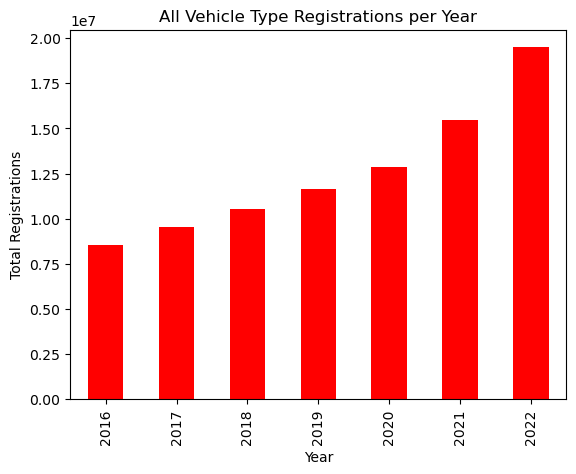

In [47]:

bar_chart = sum.plot.bar(color='r')
plt.xlabel("Year")
plt.ylabel("Total Registrations")
plt.title("All Vehicle Type Registrations per Year")
plt.show()

In [23]:
## dictionary of state abbr to state for referencing etc.
states = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}

In [8]:
location_df  = pd.read_csv(fuel_stations)

location_df = location_df.loc[location_df['State'].dropna().index] ### drop missing entries only in State column
drop_state = [i for i in location_df['State'].unique() if i not in states.keys()] ### get list of states to drop using state dictionary
for st in drop_state:
    location_df.drop(location_df[location_df['State'] == st].index,inplace = True)

lats = location_df.groupby('State').mean()['Latitude']
long = location_df.groupby('State').mean()['Longitude']
count = location_df.groupby('State').count()['Fuel Type Code']

map_df = pd.DataFrame([count,long,lats]).T ## T transposes dataframe, switches columns and index values
map_df = map_df.rename({'Fuel Type Code':'Count'},axis = 1)
map_df = map_df.reset_index()

colors = 'State'
size = 'Count'
xlab = 'x'
ylab = 'y'
fh = 500
fw = 700
map_df.hvplot.points(x='Longitude',y='Latitude',geo = True,xlabel=xlab,ylabel = ylab,c= colors,s = size,frame_height = fh,frame_width=fw,alpha = 0.75,tiles='StamenTonerBackground',scale = 0.5)

/var/folders/3c/pnxs9sq925115jh4gz7_xnhr0000gn/T/ipykernel_52724/736945179.py:1: DtypeWarning: Columns (6,20,31,46) have mixed types. Specify dtype option on import or set low_memory=False.
  location_df  = pd.read_csv(fuel_stations)
/var/folders/3c/pnxs9sq925115jh4gz7_xnhr0000gn/T/ipykernel_52724/736945179.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  lats = location_df.groupby('State').mean()['Latitude']
/var/folders/3c/pnxs9sq925115jh4gz7_xnhr0000gn/T/ipykernel_52724/736945179.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  long = location_df.groupby('State').mean()['Longitude']


ImportError: Geographic projection support requires: cartopy, geoviews, pyproj.